In [1]:
#Brandon Punturo-First Data Science Project
#I received my dataset from Analytics Vidhya. It contains a list of people and some descriptive statistics relating to their 
#loan history.
# The goal of this project was to learn which variable in the table was the most important in deciding 
#if a person would be receiving
# a loan.

In [2]:
#Importing Libraries
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [3]:
# Section 1-Overview of the data

In [4]:
df = pd.read_csv("train_u6lujuX_CVtuZ9i.csv")

In [5]:
df.shape



(614, 13)

In [6]:

df.head(10)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [9]:
# Section 2- Visualizing the Data

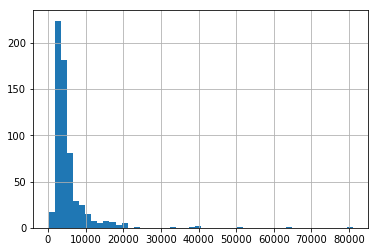

In [10]:

df['ApplicantIncome'].hist(bins=50)
plt.show()

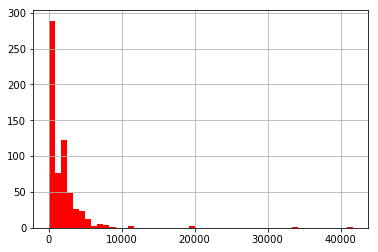

In [11]:
df['CoapplicantIncome'].hist(bins=50,color="r")
plt.show()

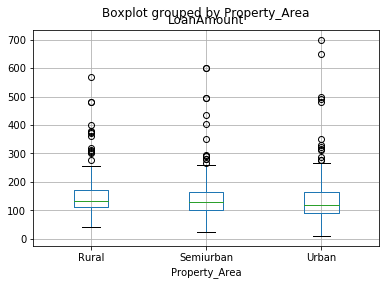

In [12]:
df.boxplot(column="LoanAmount",by="Property_Area")
plt.show()

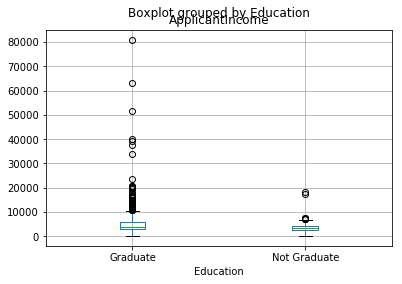

In [13]:
df.boxplot(column='ApplicantIncome',by="Education")
plt.show()

In [14]:
# Pivot Table to see relationship between Credit History, and Loan Status

In [15]:
temp1 = df['Credit_History'].value_counts(ascending=True)
print(temp1)
temp2 = df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print ('Frequency Table for Credit History:' )
print(temp2)

0.0     89
1.0    475
Name: Credit_History, dtype: int64
Frequency Table for Credit History:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


In [16]:
# Section 3- Cleaning the data. In order to plug the data into the Machine Learning Algorithh, all the NaNs values
# needed to be filled. In addition, the categorical variables needed to be encoded.

In [17]:
missing = df.shape[0] - df.dropna().shape[0]

print('%d rows have missing values' % missing)

134 rows have missing values


In [18]:
df.isnull().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [19]:
df.dtypes


Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [20]:
df.count()

Loan_ID              614
Gender               601
Married              611
Dependents           599
Education            614
Self_Employed        582
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           592
Loan_Amount_Term     600
Credit_History       564
Property_Area        614
Loan_Status          614
dtype: int64

In [21]:
def gender():
    global df
    df["Gender"].fillna(value="Male",inplace=True)
   
    dummies=pd.get_dummies(df["Gender"])
    
    df=pd.concat([df,dummies],axis=1)
    df.drop("Gender",axis=1,inplace=True)
    return(df)


In [22]:
def married():
    global df
    df["Married"].fillna(value="Yes",inplace=True)
    print(df["Married"].isnull().any())
    dummies=pd.get_dummies(df["Married"])
    
    df=pd.concat([df,dummies],axis=1)
    df.drop("Married",axis=1,inplace=True)
    return(df)
    

In [23]:
def dependent():
    global df
    df["Dependents"].fillna(value=0,inplace=True)
  
    return(df)


In [24]:
def loan_amount():
    global df
    df["LoanAmount"].fillna(value=df["LoanAmount"].mean(),inplace=True)
    return(df)


In [25]:
def loan_amount_term():
    global df
    df["Loan_Amount_Term"].fillna(value=360,inplace=True)
    return(df)


In [26]:
def Credit_History():
    global df
    df["Credit_History"].fillna(value=1.0,inplace=True)
    return(df)


In [27]:
def education():
    global df
    dummies=pd.get_dummies(df["Education"])
    
    df=pd.concat([df,dummies],axis=1)
    df.drop("Education",axis=1,inplace=True)
    return(df)


In [28]:
def status():
    global df
    dummies=pd.get_dummies(df["Loan_Status"])
    
    df=pd.concat([df,dummies],axis=1)
    df.drop("Loan_Status",axis=1,inplace=True)
    return(df)


In [29]:
gender()
married()
dependent()
loan_amount()
loan_amount_term()
Credit_History()
education()
status()

False


,Loan_ID,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Female,Male,No,Yes,Graduate,Not Graduate,N,Y
0,LP001002,0,No,5849,0.0,146.412162,360.0,1.0,Urban,0,1,1,0,1,0,0,1
1,LP001003,1,No,4583,1508.0,128.000000,360.0,1.0,Rural,0,1,0,1,1,0,1,0
2,LP001005,0,Yes,3000,0.0,66.000000,360.0,1.0,Urban,0,1,0,1,1,0,0,1
3,LP001006,0,No,2583,2358.0,120.000000,360.0,1.0,Urban,0,1,0,1,0,1,0,1
4,LP001008,0,No,6000,0.0,141.000000,360.0,1.0,Urban,0,1,1,0,1,0,0,1
5,LP001011,2,Yes,5417,4196.0,267.000000,360.0,1.0,Urban,0,1,0,1,1,0,0,1
6,LP001013,0,No,2333,1516.0,95.000000,360.0,1.0,Urban,0,1,0,1,0,1,0,1
7,LP001014,3+,No,3036,2504.0,158.000000,360.0,0.0,Semiurban,0,1,0,1,1,0,1,0
8,LP001018,2,No,4006,1526.0,168.000000,360.0,1.0,Urban,0,1,0,1,1,0,0,1
9,LP001020,1,No,12841,10968.0,349.000000,360.0,1.0,Semiurban,0,1,0,1,1,0,1,0


In [30]:
#Checking if values are all there now. I did not replace the NaNs in the Self_Employed column because I assumed this
#was not very important.
df.count()

Loan_ID              614
Dependents           614
Self_Employed        582
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           614
Loan_Amount_Term     614
Credit_History       614
Property_Area        614
Female               614
Male                 614
No                   614
Yes                  614
Graduate             614
Not Graduate         614
N                    614
Y                    614
dtype: int64

In [31]:
#Section 4-Machine Learning Algorithm. I decided to use the simplest classification algorithm(Logistic Regression) 
#for my first project. As I continue to learn more about Data Science I will learn more about the various algorithms.


In [32]:
x=df[["ApplicantIncome"]+["CoapplicantIncome"]+ ["LoanAmount"]+ ["Credit_History"]+["Loan_Amount_Term"]+["Male"]+["Female"]+["Graduate"]]


In [33]:
y=df["Y"]
y=np.ravel(y)#The Algorithm requires that Y be a 1-D Array. 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)#Performing Cross Validation.
model=LogisticRegression()
yes=model.fit(x_train,y_train)
# Fitting the Model with the training data

In [34]:
predictions=model.predict(x_test)


In [35]:
accuracy= metrics.accuracy_score(predictions,y_test)
print ("Accuracy : %s" % "{0:.3%}".format(accuracy))
# The model is 83% accurate. Pretty good for my first algorithm!

Accuracy : 83.243%


In [36]:
confusion_matrix=confusion_matrix(y_test,predictions)
print(confusion_matrix)

[[ 22  29]
 [  2 132]]


In [37]:
print ((confusion_matrix[0][0]+confusion_matrix[1][1])/(sum(sum(confusion_matrix))))
# Another way to calculate Accuracy

0.832432432432


In [38]:
print (yes.coef_) # Printing the coefficient for all the variables I Included in X

[[  5.22755572e-07  -7.17696126e-05  -1.13948024e-03   2.39703743e+00
   -4.45437696e-03   1.15127106e-01  -1.98623947e-02   5.09196058e-01]]


In [39]:
# Conclusion: It seems from this algorithm that the most important factor for determining if a person will 
#receive another loan is if they have a prior Credit History.   
